In [54]:
import yfinance as yf
import os
import pyfolio as pf
os.chdir('C:/Users/10265729/Desktop/Pratik/Data Science Bootcamp/Project 1')
from datetime import datetime
import numpy as np

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [55]:
def download_data(stock, start, end):
    data = yf.download(stock, start, end)
    return data

In [75]:
stocks = ['SPY', 'QQQ','GLD', 'TIP', 'VWO']
data = download_data(stocks, '2000-1-1', '2022-12-31')
data.to_csv('Mul.csv')

# stock_df = pd.DataFrame({
#     "Stock": ["GLD", "QQQ", "SPY", "TIP", "VWO"],
#     "EstDate": [2004, 1999, 1993, 2003, 2005],
#     "StockLab"["Gold Trust","Tech","Tech","Bonds","Emerging Markets"]
# })
# stock_df

[*********************100%***********************]  5 of 5 completed


In [76]:
data.dropna()
p_spy = data['Pct_Change_SPY'] = data['Close']['SPY'].pct_change()
p_qqq = data['Pct_Change_QQQ'] = data['Close']['QQQ'].pct_change()
p_gld = data['Pct_Change_GLD'] = data['Close']['GLD'].pct_change()
p_tip = data['Pct_Change_TIP'] = data['Close']['TIP'].pct_change()
p_vwo = data['Pct_Change_VWO'] = data['Close']['VWO'].pct_change()
data

Adj Close                                                 \
                   GLD         QQQ         SPY         TIP        VWO   
Date                                                                    
2000-01-03         NaN   81.471107   95.308769         NaN        NaN   
2000-01-04         NaN   75.882042   91.581665         NaN        NaN   
2000-01-05         NaN   73.947380   91.745506         NaN        NaN   
2000-01-06         NaN   68.868889   90.271034         NaN        NaN   
2000-01-07         NaN   77.386749   95.513557         NaN        NaN   
...                ...         ...         ...         ...        ...   
2022-12-23  167.259995  267.359985  382.910004  106.930000  38.750000   
2022-12-27  168.669998  263.579987  381.399994  106.440002  39.360001   
2022-12-28  167.910004  260.100006  376.660004  106.320000  38.790001   
2022-12-29  168.850006  266.440002  383.440002  106.760002  39.459999   
2022-12-30  169.639999  266.279999  382.429993  106.440002  38.980000   

                 Close                                                 ...  \
                   GLD         QQQ         SPY         TIP        VWO  ...   
Date                                                                   ...   
2000-01-03         NaN   94.750000  145.437500         NaN        NaN  ...   
2000-01-04         NaN   88.250000  139.750000         NaN        NaN  ...   
2000-01-05         NaN   86.000000  140.000000         NaN        NaN  ...   
2000-01-06         NaN   80.093750  137.750000         NaN        NaN  ...   
2000-01-07         NaN   90.000000  145.750000         NaN        NaN  ...   
...                ...         ...         ...         ...        ...  ...   
2022-12-23  167.259995  267.359985  382.910004  106.930000  38.750000  ...   
2022-12-27  168.669998  263.579987  381.399994  106.440002  39.360001  ...   
2022-12-28  167.910004  260.100006  376.660004  106.320000  38.790001  ...   
2022-12-29  168.850006  266.440002  383.440002  106.760002  39.459999  ...   
2022-12-30  169.639999  266.279999  382.429993  106.440002  38.980000  ...   

               Volume                                             \
                  GLD       QQQ       SPY        TIP         VWO   
Date                                                               
2000-01-03        NaN  36345200   8164300        NaN         NaN   
2000-01-04        NaN  33786600   8089800        NaN         NaN   
2000-01-05        NaN  42496600  12177900        NaN         NaN   
2000-01-06        NaN  37134800   6227200        NaN         NaN   
2000-01-07        NaN  28138200   8066500        NaN         NaN   
...               ...       ...       ...        ...         ...   
2022-12-23  2912300.0  39373600  59857300  2523500.0  14616500.0   
2022-12-27  6885700.0  38009000  51638200  2464500.0  13829000.0   
2022-12-28  3662500.0  47139000  70911500  3091400.0  15688000.0   
2022-12-29  3345900.0  45893600  66970900  3141300.0  13383100.0   
2022-12-30  2863300.0  37796100  83975100  4694200.0  15760600.0   

           Pct_Change_SPY Pct_Change_QQQ Pct_Change_GLD Pct_Change_TIP  \
                                                                         
Date                                                                     
2000-01-03            NaN            NaN            NaN            NaN   
2000-01-04      -0.039106      -0.068602            NaN            NaN   
2000-01-05       0.001789      -0.025496            NaN            NaN   
2000-01-06      -0.016071      -0.068677            NaN            NaN   
2000-01-07       0.058076       0.123683            NaN            NaN   
...                   ...            ...            ...            ...   
2022-12-23       0.005752       0.002249       0.002998      -0.002239   
2022-12-27      -0.003944      -0.014138       0.008430      -0.004582   
2022-12-28      -0.012428      -0.013203      -0.004506      -0.001127   
2022-12-29       0.018000       0.024375       0.005598 

In [77]:
spy = (data['Pct_Change_SPY']+1).cumprod()
qqq = (data['Pct_Change_QQQ']+1).cumprod()
gld = (data['Pct_Change_GLD']+1).cumprod()
tip = (data['Pct_Change_TIP']+1).cumprod()
vwo = (data['Pct_Change_VWO']+1).cumprod()



Completed Analysis Uploaded to GitHub (20 points) 
- Merge all the files by date to compare and contrast all major ETF's and analyze there returns by using Entry and Exit rules for Moving Average or simpely buying and sitting on it for 20 years
- Return(Simple Retruns, Daily - Current day / Prev day)
- Standard dev on return - Can tell us volatility
- All Stat analysis on returns (using pyflio library)

** Which of the 5 ETF's is most volatile and returns (graph)
** Best overall retruns
** 


Final data analysis contains ample and complete information in README file (10 points)
- Gather our findings 

Final repository is acceptable for professional quality presentation (10 points)
- In notebook
Visualizations (20 points)
6–8 visualizations of data (at least two per question) (10 points)
 - Use PyFolio library (tear sheet - This library alone will get us 10 plus visulazation)
 - Retruns charts
 - STDEV charts
 - Regression charts


Clear and accurate labeling of images (5 points)
Visualizations supported with ample and precise explanation (5 points)
Analysis and Conclusion (20 points)
- Which ever etf provides best returns with lowest risk will get most amount of allocation from portfolio

Write-up summarizes major findings and implications at a professional level (5 points)
Each question in the project proposal is answered with precise descriptions and findings (5 points)
Findings are strongly supported with numbers and visualizations (5 points)
Each question response is supported with a well-discerned statistical analysis from lessons (e.g., aggregation, correlation, comparison, summary statistics, sentiment analysis, and time series analysis) (5 points)
Group Presentation (20 points)
All group members spoke during the presentation (5 points)
Group was well prepared (5 points)
Presentation is relevant to material (5 points)
Presentation maintains audience interest (5 points)
Slide Deck (20 points)
Slides are visually clean and professional (5 points)
Slides are relevant to material (5 points)
Slides effectively demonstrate the project (5 points)
Slides are clear and maintain audience interest (5 points)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


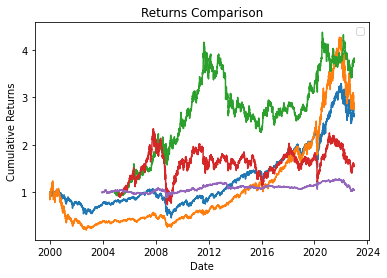

In [78]:

plt.plot(spy)
plt.plot(qqq)
plt.plot(gld)
plt.plot(vwo)
plt.plot(tip)

plt.ylabel('Cumulative Returns')
plt.xlabel('Date')
plt.title('Returns Comparison')
plt.legend()
plt.show()

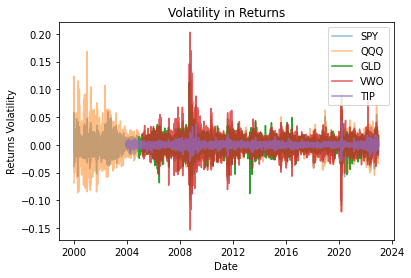

In [80]:
plt.plot(p_spy, alpha = 0.5)
plt.plot(p_qqq, alpha = 0.5)
plt.plot(p_gld, alpha = 1)
plt.plot(p_vwo, alpha = 0.75)
plt.plot(p_tip, alpha = 0.75)




plt.ylabel('Returns Volatility')
plt.xlabel('Date')
plt.title('Volatility in Returns')
plt.legend(['SPY','QQQ', 'GLD', 'VWO', 'TIP'], loc = 'upper right')
plt.show()
# plt.plot(qqq_std)

Start date,2000-01-03
End date,2022-12-30
Total months,275
,Backtest
Annual return,6.2%
Cumulative returns,301.3%
Annual volatility,19.9%
Sharpe ratio,0.40
Calmar ratio,0.11
Stability,0.85
Max drawdown,-55.2%


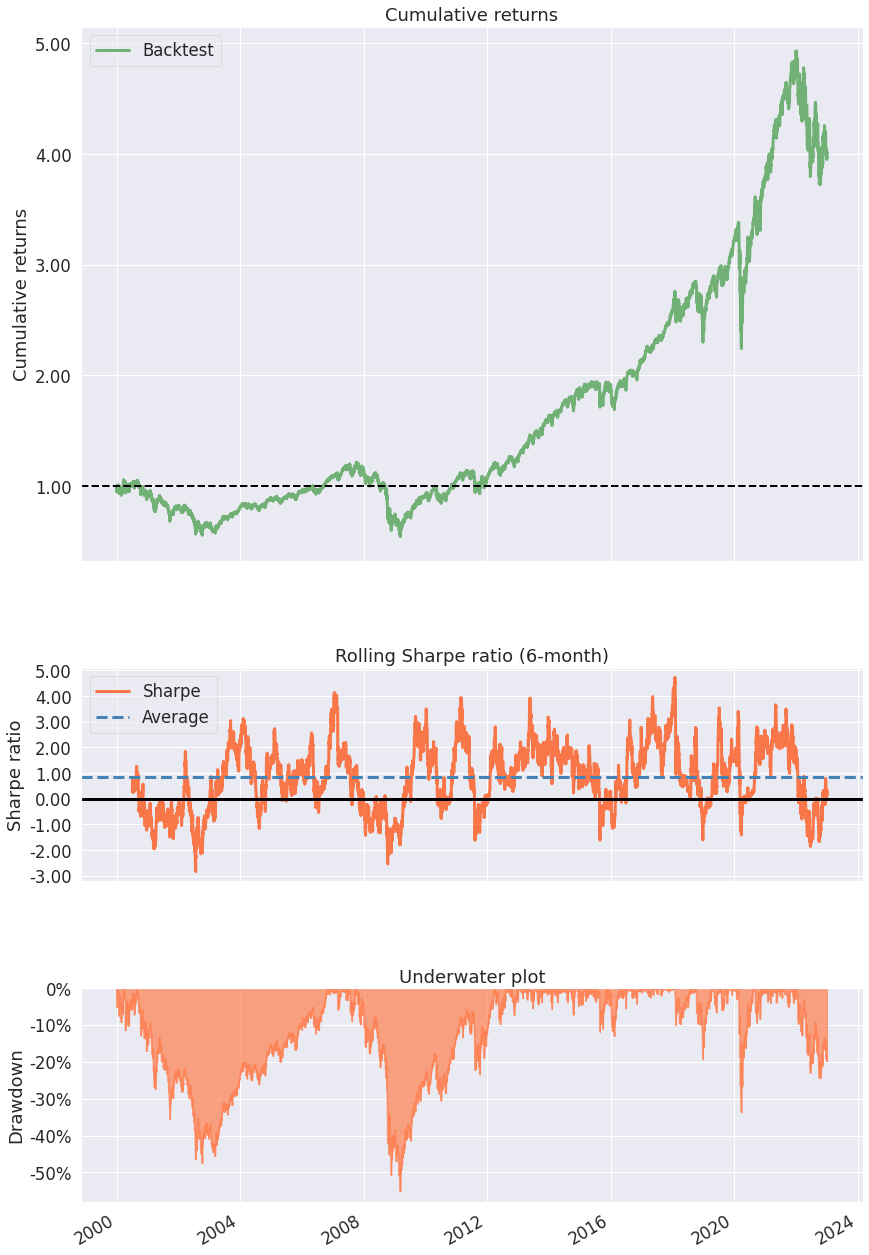

In [110]:
pf.create_simple_tear_sheet(data['Adj Close']['SPY'].pct_change())



In [143]:
pf.create_simple_tear_sheet(data['Adj Close']['QQQ'].pct_change(),)

TypeError: create_simple_tear_sheet() missing 1 required positional argument: 'returns'

Start date,2000-01-03
End date,2022-12-30
Total months,275
,Backtest
Annual return,6.0%
Cumulative returns,282.2%
Annual volatility,17.9%
Sharpe ratio,0.50
Calmar ratio,0.13
Stability,0.62
Max drawdown,-45.6%


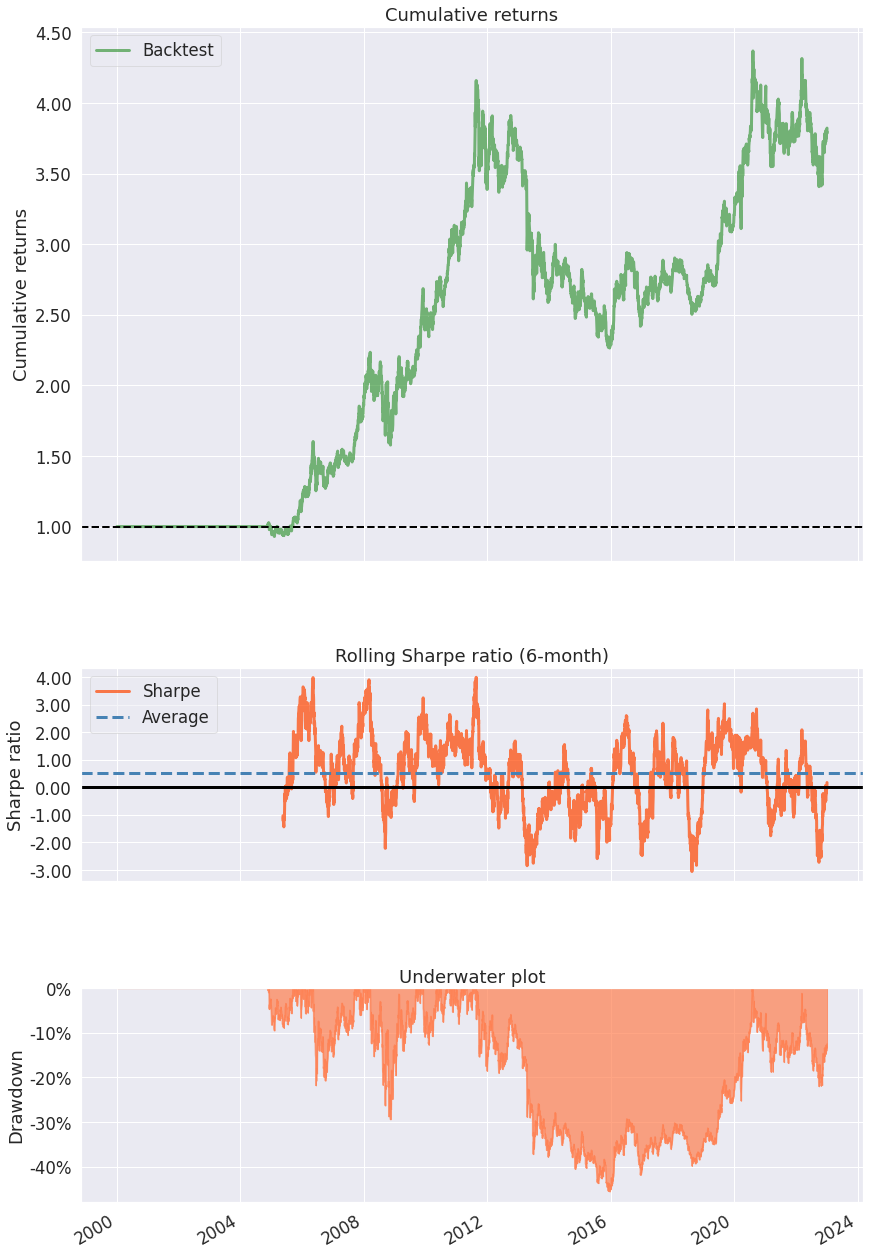

In [111]:
pf.create_simple_tear_sheet(data['Adj Close']['GLD'].pct_change())

Start date,2000-01-03
End date,2022-12-30
Total months,275
,Backtest
Annual return,4.0%
Cumulative returns,147.2%
Annual volatility,27.7%
Sharpe ratio,0.32
Calmar ratio,0.06
Stability,0.62
Max drawdown,-67.7%


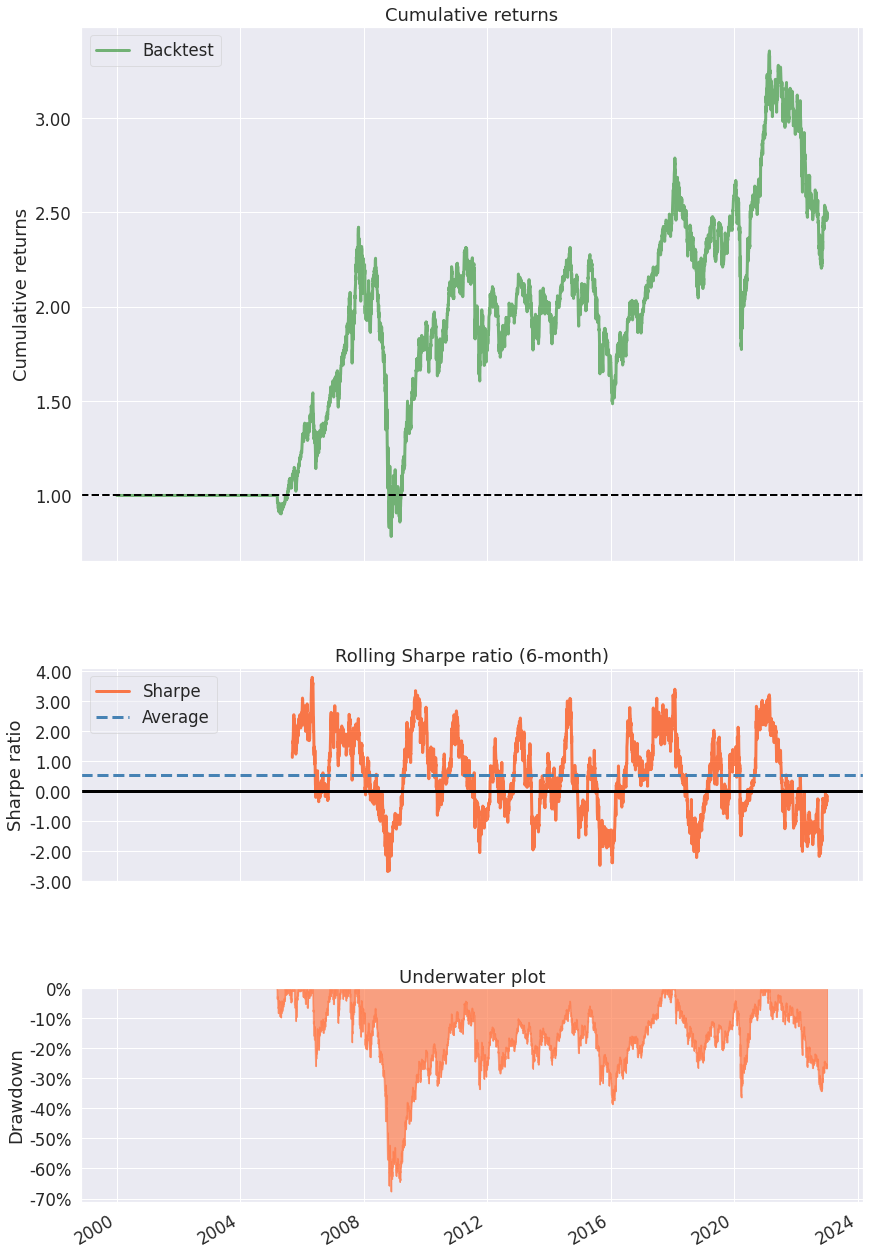

In [112]:
pf.create_simple_tear_sheet(data['Adj Close']['VWO'].pct_change())

<AxesSubplot:title={'center':'Annual returns'}, xlabel='Returns', ylabel='Year'>

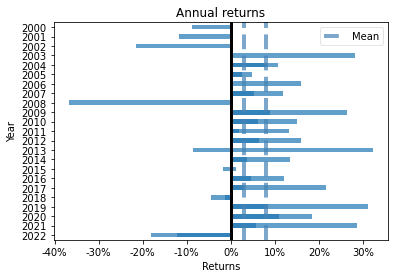

In [142]:
pf.plot_annual_returns(data['Adj Close']['TIP'].pct_change())
pf.plot_annual_returns(data['Adj Close']['SPY'].pct_change())
# pf.plot_annual_returns(data['Adj Close']['QQQ'].pct_change())

In [129]:
pf.plot(data['Adj Close']['QQQ'].pct_change())

AttributeError: 'Series' object has no attribute 'pnl'